In [85]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
import mplleaflet
import vincent

# enable the notebook to show the graph for vincent
vincent.core.initialize_notebook()

In [86]:
ohio_counties = gpd.read_file("Ohio_Counties.shx")

In [87]:
ohio_counties.head()

,geometry
0,"POLYGON ((-84.39954710435259 41.7058604309323,..."
1,"POLYGON ((-84.82015899999999 39.227225, -84.82..."
2,"(POLYGON ((-83.110613 41.737752, -83.110148999..."
3,"(POLYGON ((-82.742311 41.496527, -82.739933999..."
4,"POLYGON ((-81.97086399999999 41.375376, -81.97..."


In [88]:
f, ax = plt.subplots(1, figsize=(9, 8))
ax = ohio_counties.plot(ax=ax, cmap='Blues', linewidth=1)
ax.set_title("Ohio Counties")
ax.set_axis_off()
mplleaflet.display(fig=ax.figure)

In [89]:
# read the data from csv file
obesity_status = pd.read_csv("Ohio_Obesity.csv")

In [90]:
obesity_status.head()

,County,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,index
0,Adams County,25.4,26.1,28.1,29.3,29.6,31.2,30.7,29.6,28.3,31.1,0
1,Allen County,26.2,26.4,29.4,31.1,32.5,36.8,37.3,36.8,33.8,35.4,1
2,Ashland County,24.8,24.9,27.0,28.7,29.2,30.4,30.7,30.0,30.1,27.9,2
3,Ashtabula County,24.7,24.6,27.2,29.5,30.5,31.0,30.0,32.0,30.7,33.5,3
4,Athens County,24.8,26.3,28.5,29.4,30.9,32.0,33.1,29.9,28.8,28.3,4


In [91]:
obesity_2004 = pd.merge(ohio_counties,obesity_status[['County', '2004', 'index']],
                 how='left', left_index = True, right_on='index')

In [92]:
obesity_2004.head()

,geometry,County,2004,index
0,"POLYGON ((-84.39954710435259 41.7058604309323,...",Adams County,25.4,0
1,"POLYGON ((-84.82015899999999 39.227225, -84.82...",Allen County,26.2,1
2,"(POLYGON ((-83.110613 41.737752, -83.110148999...",Ashland County,24.8,2
3,"(POLYGON ((-82.742311 41.496527, -82.739933999...",Ashtabula County,24.7,3
4,"POLYGON ((-81.97086399999999 41.375376, -81.97...",Athens County,24.8,4


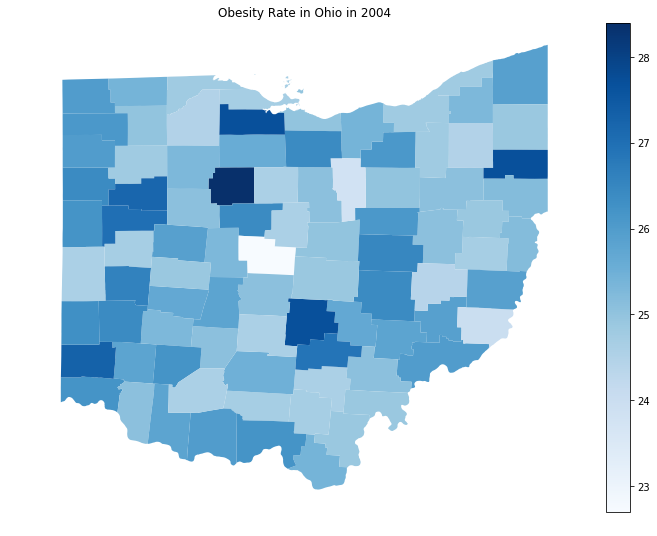

In [93]:
f, ax = plt.subplots(1, figsize=(12, 9))
ax = obesity_2004.plot(column='2004',
                 ax=ax, linewidth=0, cmap='Blues', legend=True, k=8 )
ax.set_title("Obesity Rate in Ohio in 2004")
ax.set_axis_off()
plt.show()

In [95]:
obesity_change = pd.read_csv("test_oh.csv")

group = vincent.GroupedBar(obesity_change, iter_idx='County', width = 20, height = 160)
group.legend(title='Categories')
group.colors(brew='Spectral')
group.width=750
group.display()

In [80]:
obesity_df = pd.read_csv("oh_obesity.csv")

In [13]:
obesity_df.columns = obesity_df.columns.str.strip()

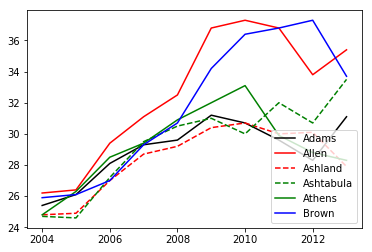

In [15]:
# plot trending plot for random 6 counties
plt.plot(obesity_df.Year,obesity_df['Adams'], 'k-', label='Adams')
plt.plot(obesity_df.Year,obesity_df['Allen'], 'r-', label='Allen')
plt.plot(obesity_df.Year,obesity_df['Ashland'], 'r--', label='Ashland')
plt.plot(obesity_df.Year,obesity_df['Ashtabula'], 'g--', label='Ashtabula')
plt.plot(obesity_df.Year,obesity_df['Athens'], 'g-', label='Athens')
plt.plot(obesity_df.Year,obesity_df['Brown'], 'b-', label='Brown')
plt.legend(loc='lower right')


In [16]:
obesity_df['Adams']

0    25.4
1    26.1
2    28.1
3    29.3
4    29.6
5    31.2
6    30.7
7    29.6
8    28.3
9    31.1
Name: Adams, dtype: float64